In [1]:
import random,numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.measure import structural_similarity as ssim
import cv2


In [2]:
def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err


In [31]:
def black(image, no_of_points):

    #black = []
    for points in range(no_of_points):
        rand_row = random.randint(0,len(image)- 1)
        rand_col = random.randint(0,len(image[0]) - 1)
        if((image[rand_row][rand_col] == 1)):
            image[rand_row][rand_col] = 0
            #black.append((rand_row,rand_col))
        else:
            points -= 1
    return image

In [32]:
def createImage(row, col, no_of_points):
    
    Z = np.random.random((row,col))
    img = np.ones((row,col))
    
    #blac = black(img, no_of_points)
    img = black(img, no_of_points)
    """
    for cord in blac:
        img[cord[0], cord[1]] = [0,0,0]
    """
    return img


In [5]:
def newPopulation(pop_max, target_img, num_of_points):
    
    row = len(target)
    col = len(target[0])
    population = []
    for image in range(pop_max):
        im = createImage(row, col, num_of_points)
        population.append(im)
        
    return population

In [146]:
def fitness(image, target):
    
    
    """
    ms = mse(image, target)
    score = 1/(10**(ms))
    return (score**4)*100
    
    """
    score = 0
    for row in range(len(image)):
        for col in range(len(image[0])):
            if(((image[row][col] == 0) and (target[row][col] == 0)) ):
                score += 1
            
    return (score)
    

In [147]:
def populationFitness(population, target):
    """
    score = []
    min_score = 999
    for image in population:
        fitness_score = fitness(image, target)
        score.append(fitness_score)
        """"""
        if(fitness_score<min_score):
            min_score = fitness_score
        """"""
    
    for i in range(len(score)):
        #score[i] = score[i] - min_score + 1
        score[i] = int (score[i] )
    
    return [population, score]
    """
    score = []
    min_score = 9999999
    for image in population:
        fitness_score = fitness(image, target)
        score.append(fitness_score)
        if(fitness_score<min_score):
            min_score = (fitness_score)
    
    for i in range(len(score)):
        score[i] = score[i] - min_score + 1
        score[i] = int (score[i]**2 )
        
    return [population, score]
    

In [126]:
def matingPool(population_fitness):
    population = population_fitness[0]
    score = population_fitness[1]
    pool = []
    for i in range(len(population)):
        for j in range(score[i]):
            pool.append(population[i])
    return pool

In [120]:
import random 
def createChild(img1, img2, num_of_points):
    row = len(img1)
    col = len(img1[0])
    black = []
    Z = np.random.random((row,col))
    G = np.ones((row,col))
    num_points = 0
    for i in range(row):
        for j in range(col):
            if((img1[i][j] == 0) and (img2[i][j] == 0)):
                p = 0.9
            elif((img1[i][j] == 0) or (img2[i][j] == 0)):
                p = 0.3
            else:
                p = 0.1
            n = random.random()
            if(n<p):
                G[i][j] = 0
                black.append([i,j])
                num_points += 1
            if(num_points > num_of_points):
                break
    return G,black


In [121]:
def createChildren(pool, pop_max, num_of_points):
    
    population = []
    population_points =[]
    for i in range(pop_max):
        
        rand1 = random.randint(0,len(pool)-1)
        rand2 = random.randint(0,len(pool)-1)
        child,black = createChild(pool[rand1], pool[rand2], num_of_points)
        population.append(child)
        population_points.append(black)
    
    return population,population_points

In [122]:
import random
def mutateImage(img,black):
    for i in range(2):
        
        rand_index = random.randint(0,len(black)-1)
        i_b, j_b = black[rand_index]
        img[i_b][j_b] = 1
        while(True):
            row_rand = random.randint(0,len(img)-1)
            col_rand = random.randint(0,len(img[0])-1)

            if((img[row_rand][col_rand] == 1)):
                img[row_rand][col_rand] = 0
                break
            
        
        
        
    return img

In [123]:
def mutatePopulation(population, chance_of_mutation,population_points):
    for i in range(len(population)):
        rand = random.randint(0,100)
        black = population_points[i]
        if(rand < chance_of_mutation):
            population[i] = mutateImage(population[i],black)
    return population


no of generation: 1
4


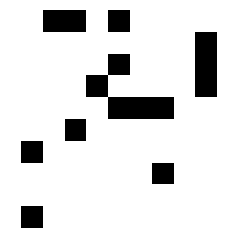

no of generation: 2
4


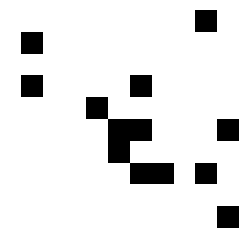

no of generation: 3
5


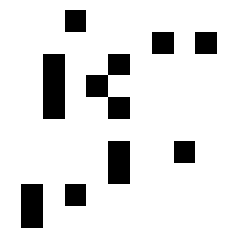

no of generation: 4
5


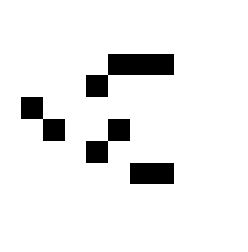

no of generation: 5
5


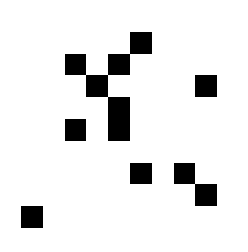

no of generation: 6
5


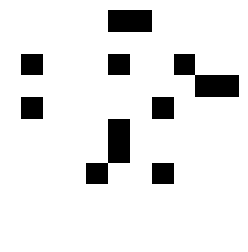

no of generation: 7
5


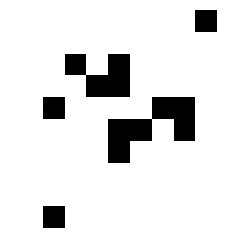

no of generation: 8
5


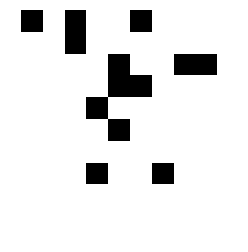

no of generation: 9
5


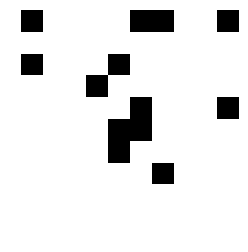

no of generation: 10
5


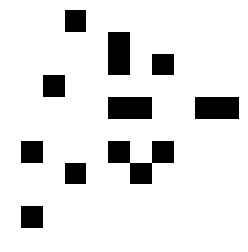

no of generation: 11
5


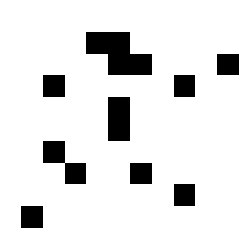

no of generation: 12
5


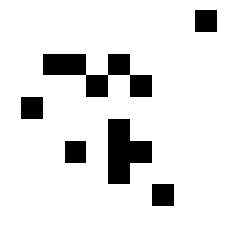

no of generation: 13
4


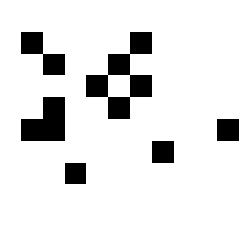

no of generation: 14
5


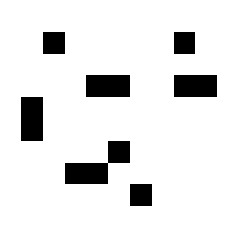

no of generation: 15
5


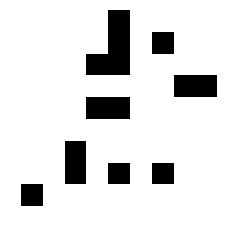

no of generation: 16
4


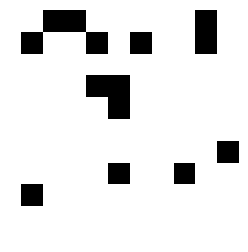

no of generation: 17
5


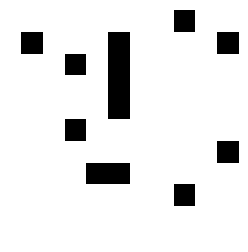

no of generation: 18
5


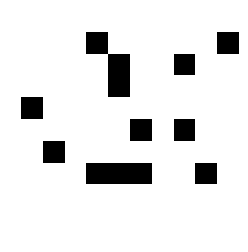

no of generation: 19
5


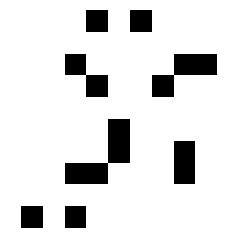

no of generation: 20
6


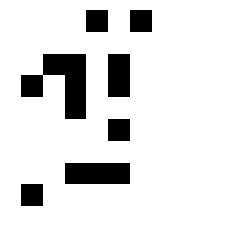

no of generation: 21
4


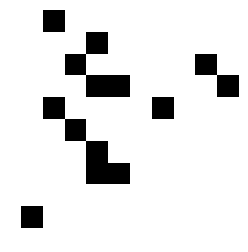

no of generation: 22
5


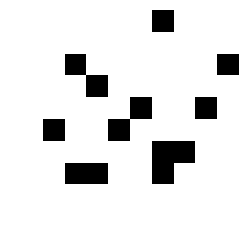

no of generation: 23
5


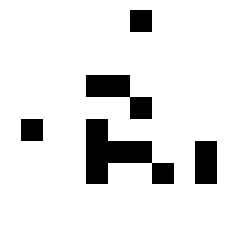

no of generation: 24
6


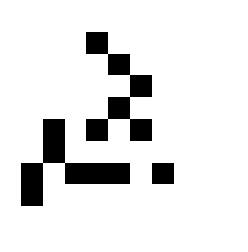

no of generation: 25
6


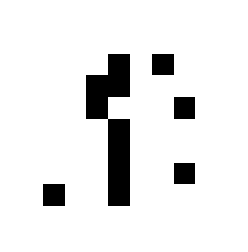

no of generation: 26
6


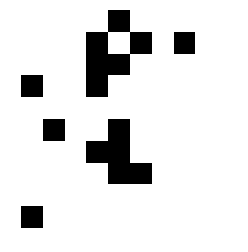

no of generation: 27
4


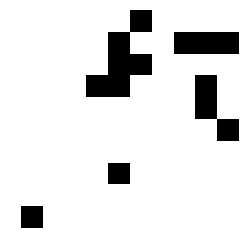

no of generation: 28
4


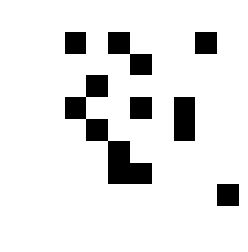

no of generation: 29
4


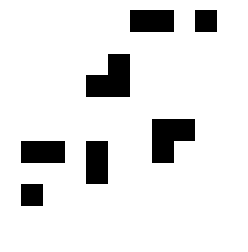

no of generation: 30
4


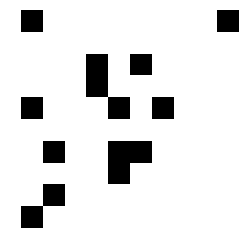

no of generation: 31
4


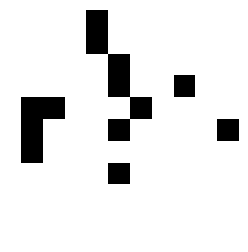

no of generation: 32
4


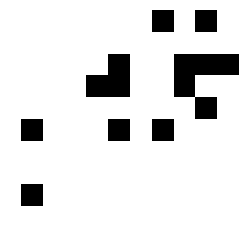

no of generation: 33
4


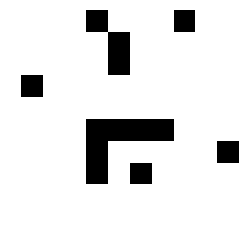

no of generation: 34
4


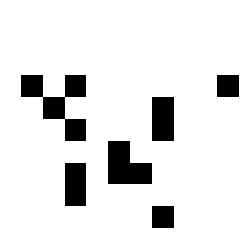

no of generation: 35
5


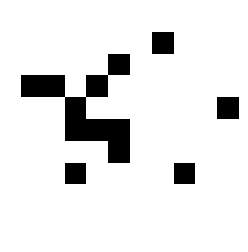

no of generation: 36
5


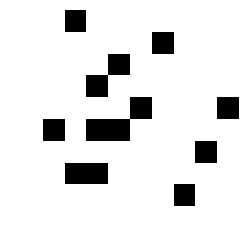

no of generation: 37
4


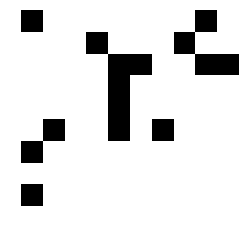

no of generation: 38
5


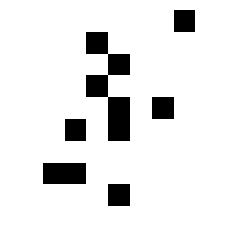

no of generation: 39
4


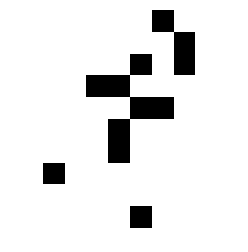

no of generation: 40
5


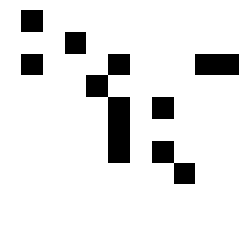

no of generation: 41
5


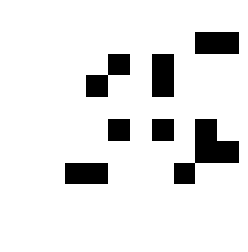

no of generation: 42
5


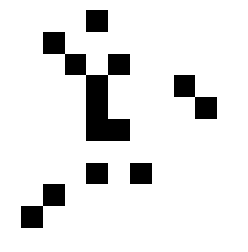

no of generation: 43
5


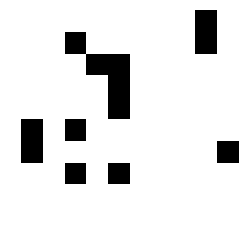

no of generation: 44
4


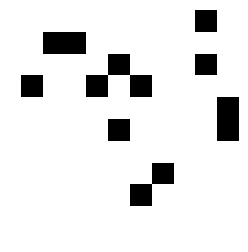

no of generation: 45
6


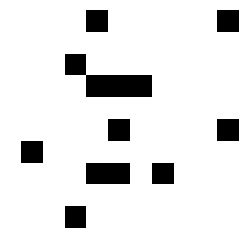

no of generation: 46
6


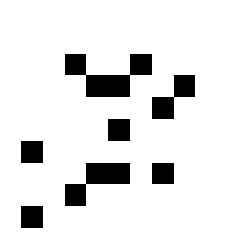

no of generation: 47
5


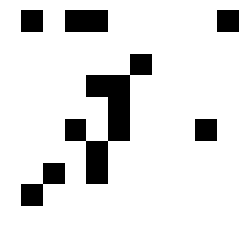

no of generation: 48
4


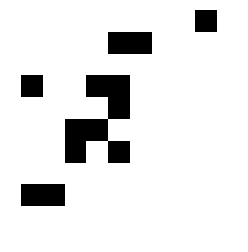

no of generation: 49
6


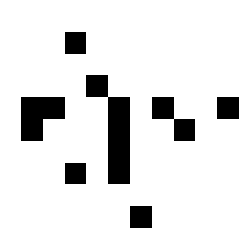

no of generation: 50
5


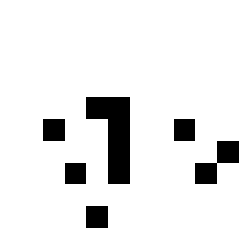

no of generation: 51
6


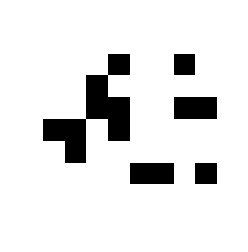

no of generation: 52
6


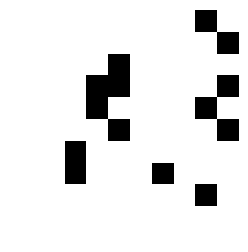

no of generation: 53
5


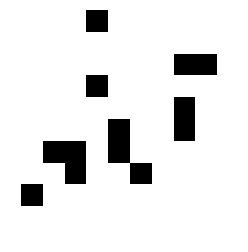

no of generation: 54
4


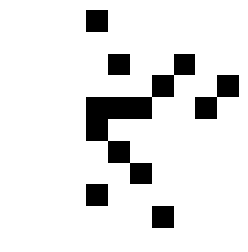

no of generation: 55
6


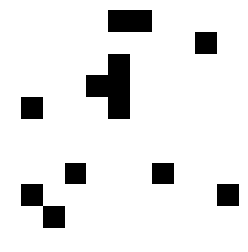

no of generation: 56
5


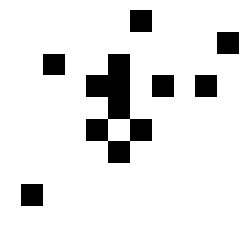

no of generation: 57
4


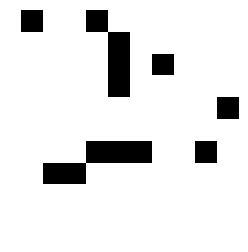

no of generation: 58
6


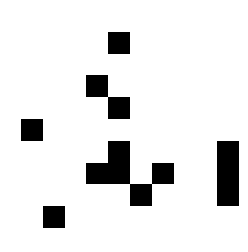

no of generation: 59
5


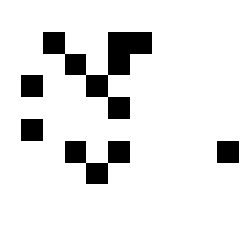

no of generation: 60
5


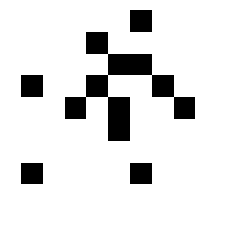

no of generation: 61
6


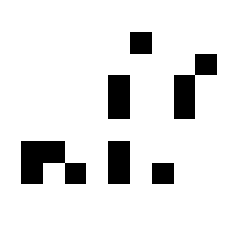

no of generation: 62
5


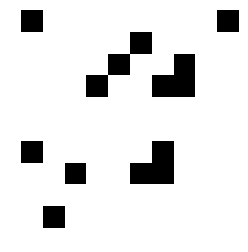

no of generation: 63
4


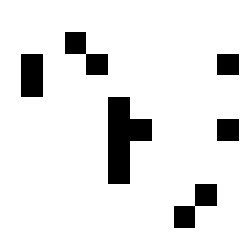

no of generation: 64
5


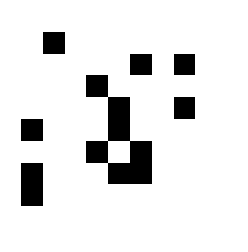

no of generation: 65
5


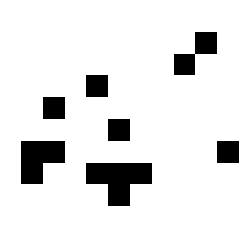

no of generation: 66
4


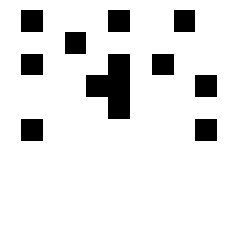

no of generation: 67
5


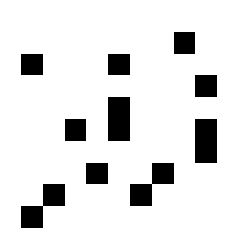

no of generation: 68
4


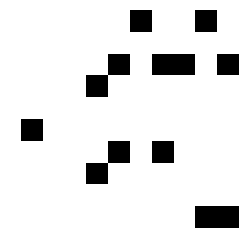

no of generation: 69
4


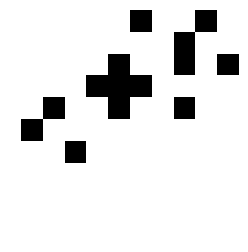

no of generation: 70
5


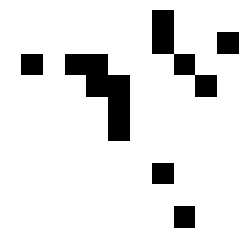

no of generation: 71
6


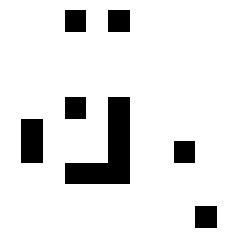

no of generation: 72
5


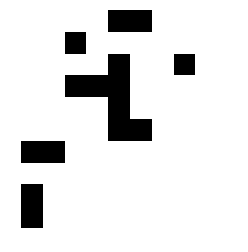

no of generation: 73
4


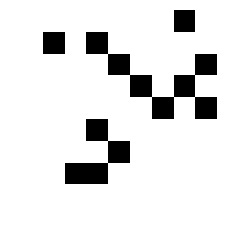

no of generation: 74
4


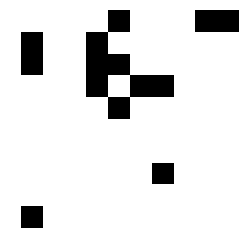

no of generation: 75
5


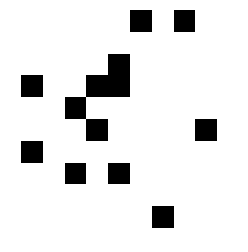

no of generation: 76
4


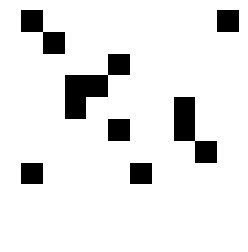

no of generation: 77
4


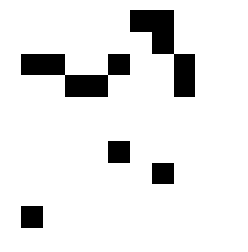

no of generation: 78
5


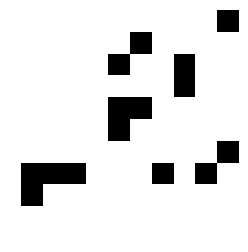

no of generation: 79
4


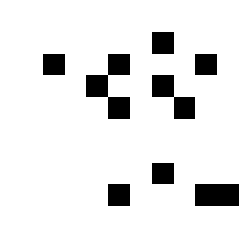

no of generation: 80
5


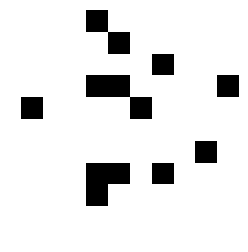

no of generation: 81
6


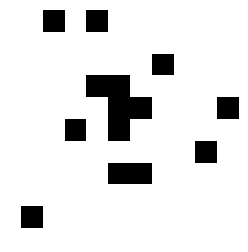

no of generation: 82
5


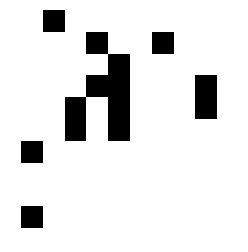

no of generation: 83
6


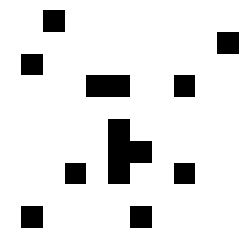

no of generation: 84
4


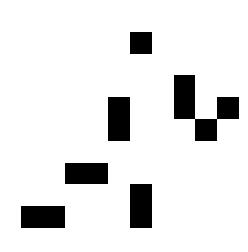

no of generation: 85
4


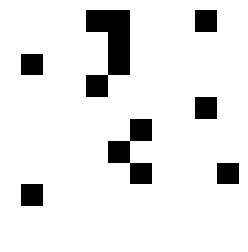

no of generation: 86
4


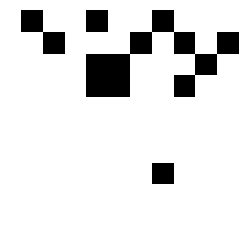

no of generation: 87
4


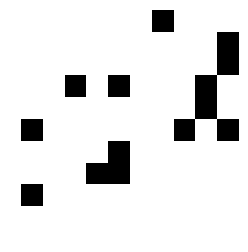

no of generation: 88
4


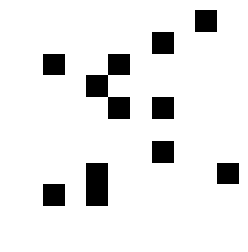

no of generation: 89
4


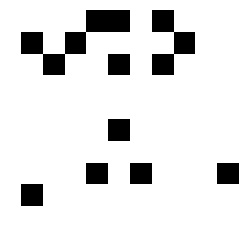

no of generation: 90
5


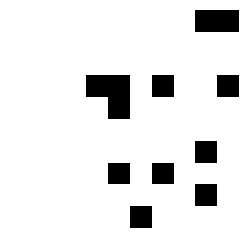

no of generation: 91
4


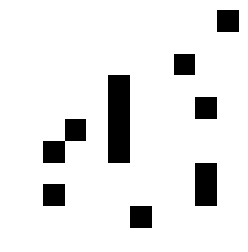

no of generation: 92
6


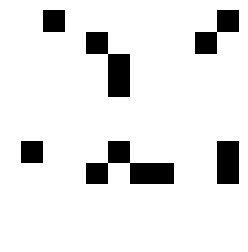

no of generation: 93
6


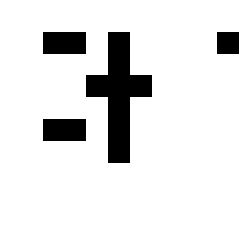

no of generation: 94
6


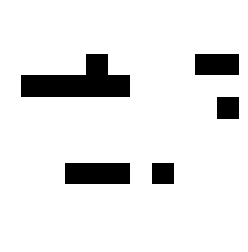

no of generation: 95
5


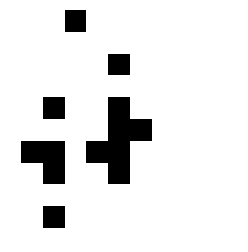

no of generation: 96
6


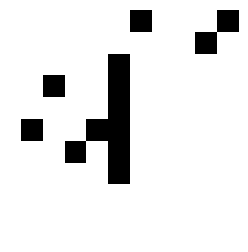

no of generation: 97
5


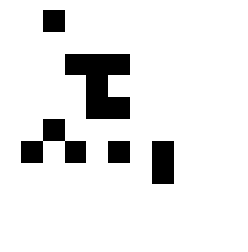

no of generation: 98
4


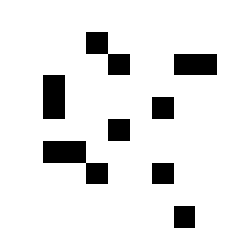

no of generation: 99
4


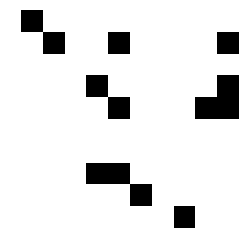

no of generation: 100
4


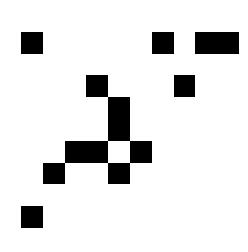

no of generation: 101
5


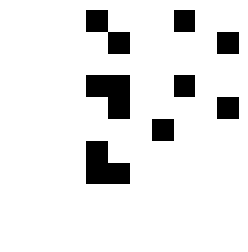

no of generation: 102
3


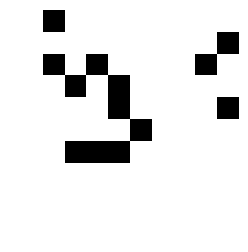

no of generation: 103
4


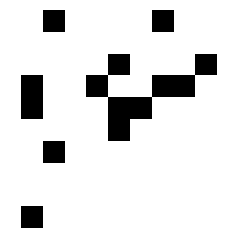

no of generation: 104
4


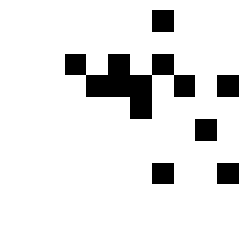

no of generation: 105
4


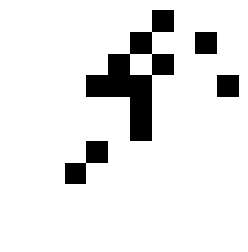

no of generation: 106
4


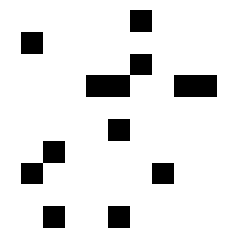

no of generation: 107
5


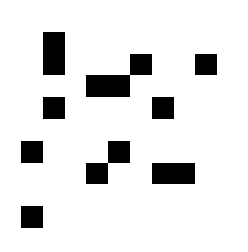

no of generation: 108
3


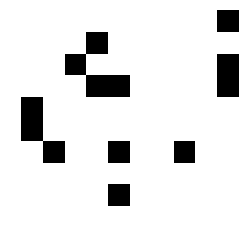

no of generation: 109
4


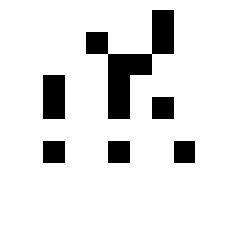

no of generation: 110
5


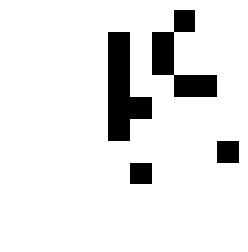

no of generation: 111
6


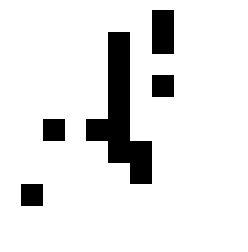

no of generation: 112
6


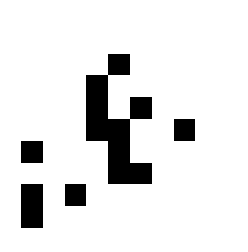

no of generation: 113
4


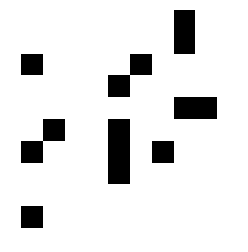

no of generation: 114
4


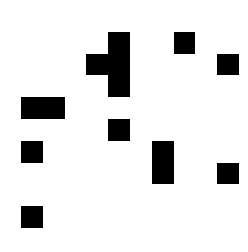

no of generation: 115
4


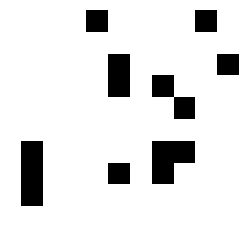

no of generation: 116
4


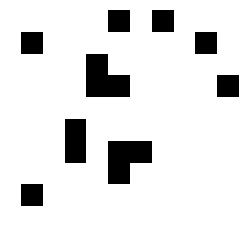

no of generation: 117
4


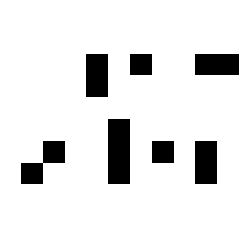

no of generation: 118
4


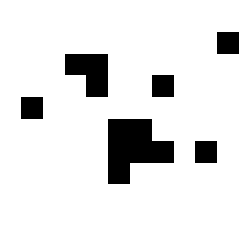

no of generation: 119
4


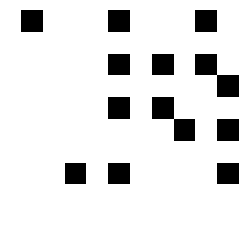

no of generation: 120
5


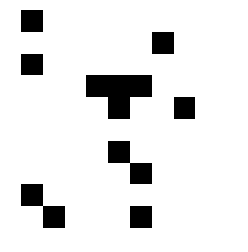

no of generation: 121
4


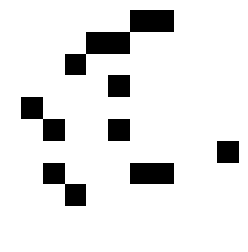

no of generation: 122
5


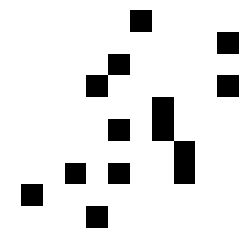

no of generation: 123
5


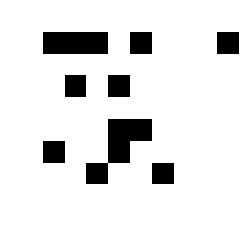

no of generation: 124
4


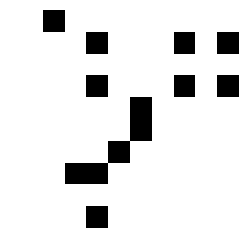

no of generation: 125
4


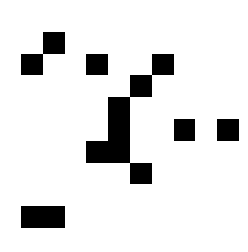

no of generation: 126
4


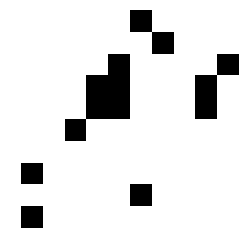

no of generation: 127
4


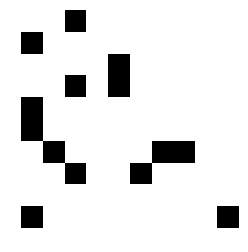

no of generation: 128
4


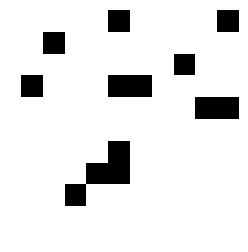

no of generation: 129
4


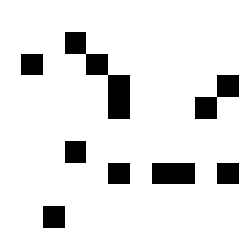

no of generation: 130
5


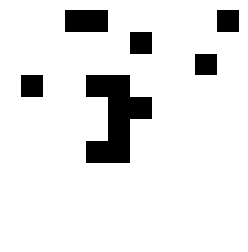

no of generation: 131
6


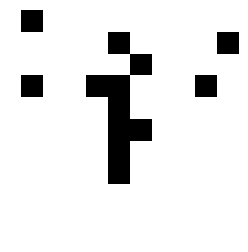

no of generation: 132
4


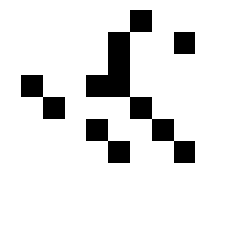

no of generation: 133
5


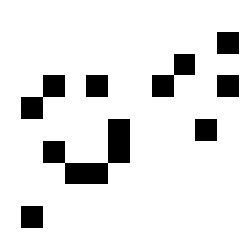

no of generation: 134
4


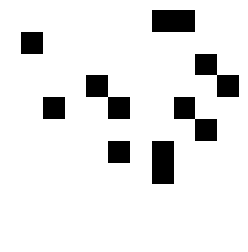

no of generation: 135
4


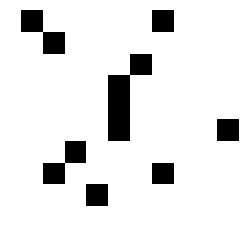

no of generation: 136
5


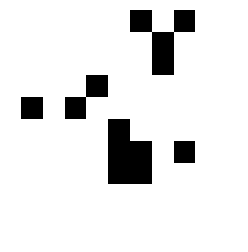

no of generation: 137
5


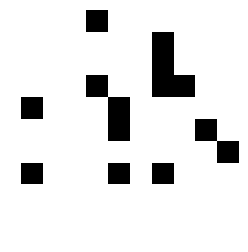

no of generation: 138
5


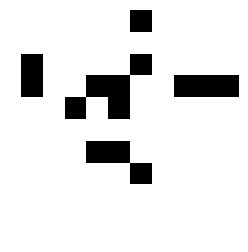

no of generation: 139
4


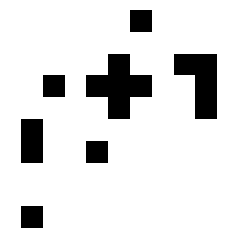

no of generation: 140
5


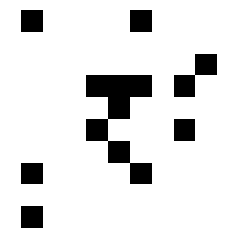

no of generation: 141
5


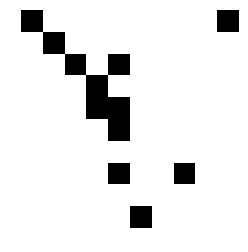

no of generation: 142
4


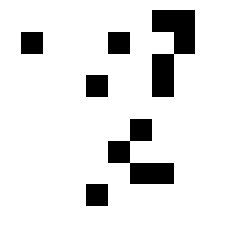

no of generation: 143
4


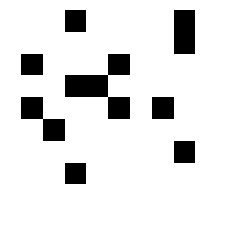

no of generation: 144
4


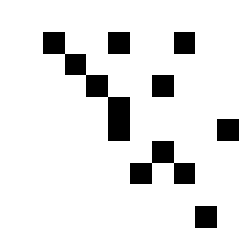

no of generation: 145
4


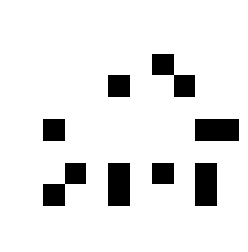

no of generation: 146
5


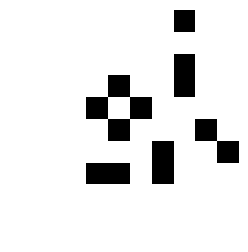

no of generation: 147
4


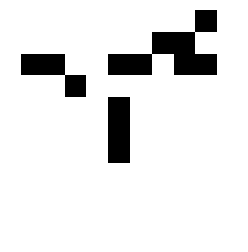

no of generation: 148
4


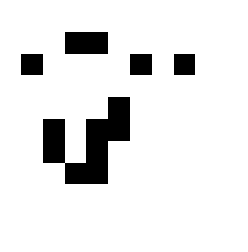

no of generation: 149
3


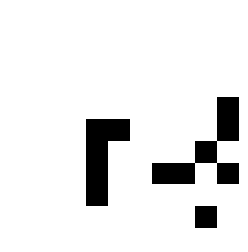

no of generation: 150
4


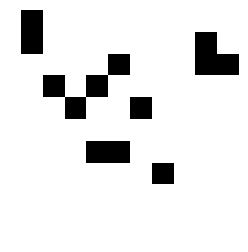

no of generation: 151
4


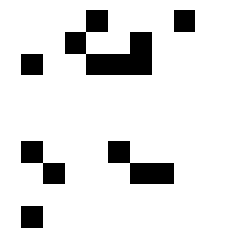

no of generation: 152
5


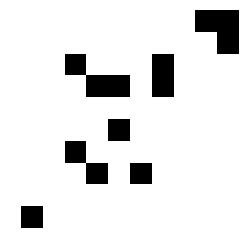

no of generation: 153
4


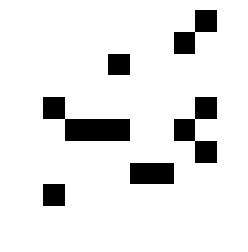

no of generation: 154
4


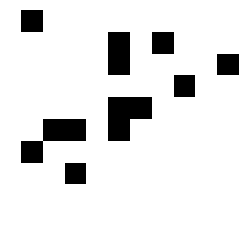

no of generation: 155
6


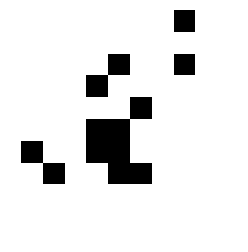

no of generation: 156
4


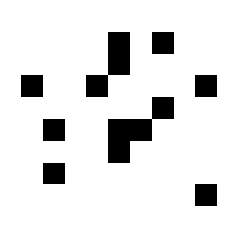

no of generation: 157
4


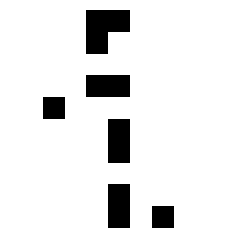

no of generation: 158
5


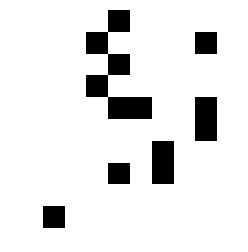

no of generation: 159
5


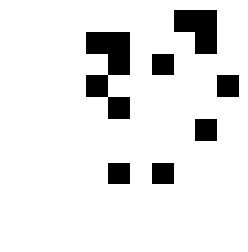

no of generation: 160
5


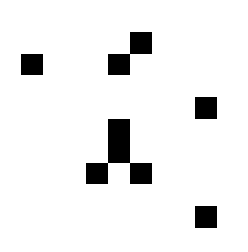

no of generation: 161
5


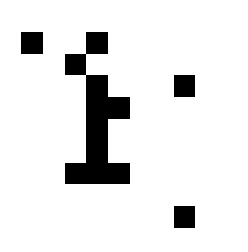

no of generation: 162
4


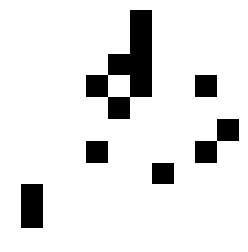

no of generation: 163
5


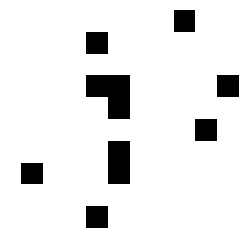

no of generation: 164
4


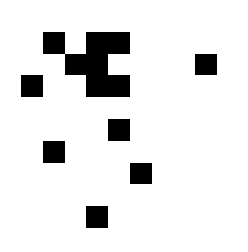

no of generation: 165
4


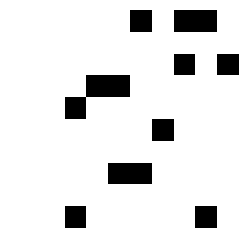

no of generation: 166
3


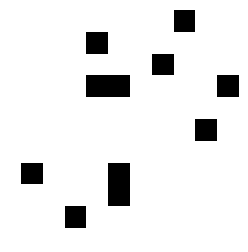

no of generation: 167
4


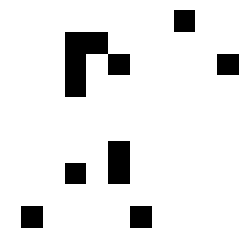

no of generation: 168
5


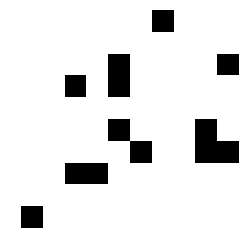

no of generation: 169
5


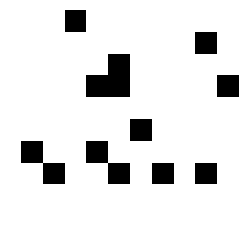

no of generation: 170
5


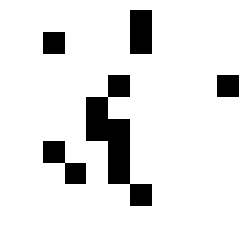

no of generation: 171
4


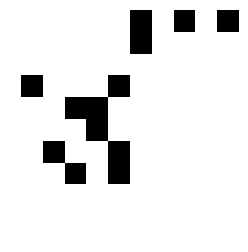

no of generation: 172
5


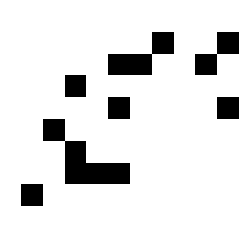

no of generation: 173
4


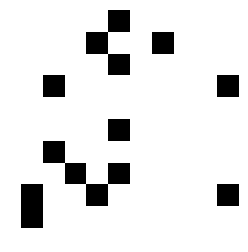

no of generation: 174
5


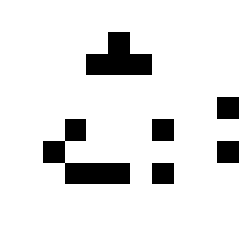

no of generation: 175
4


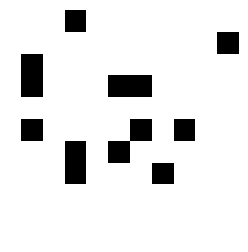

no of generation: 176
5


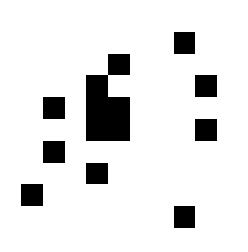

no of generation: 177
5


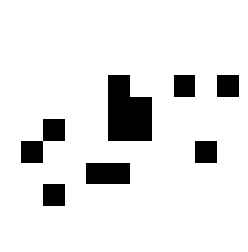

no of generation: 178
4


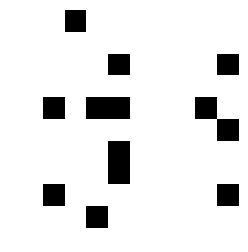

no of generation: 179
4


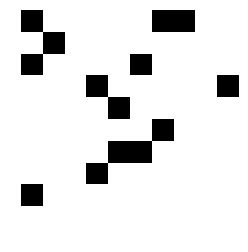

no of generation: 180
5


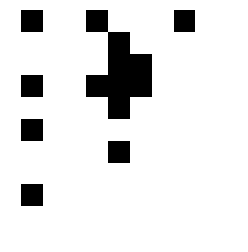

no of generation: 181
5


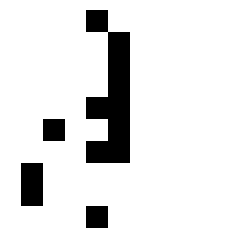

no of generation: 182
3


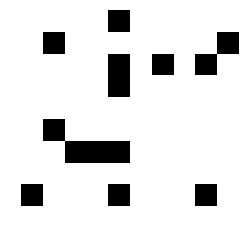

no of generation: 183
4


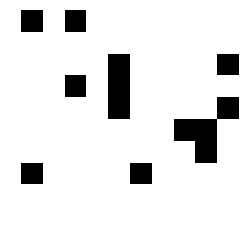

no of generation: 184
5


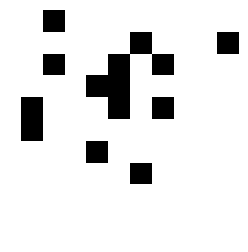

no of generation: 185
4


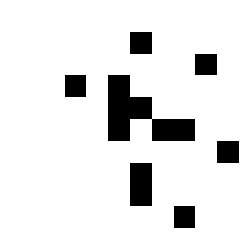

no of generation: 186
4


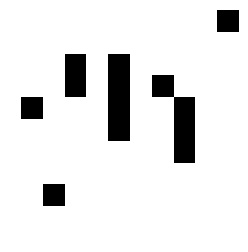

no of generation: 187
5


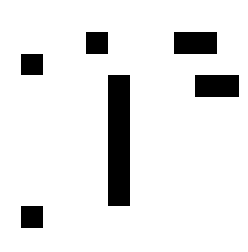

no of generation: 188
4


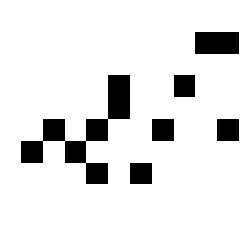

no of generation: 189
4


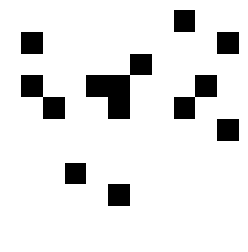

no of generation: 190
7


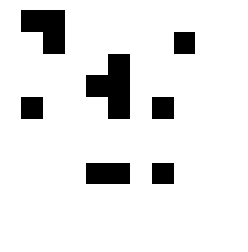

no of generation: 191
5


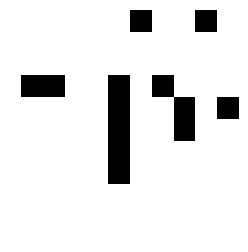

no of generation: 192
5


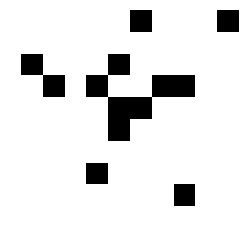

no of generation: 193
5


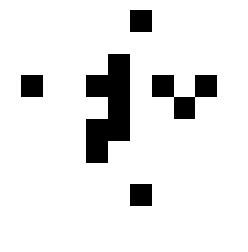

no of generation: 194
5


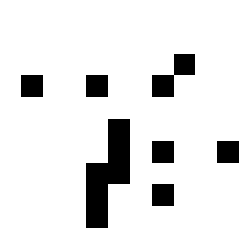

no of generation: 195
4


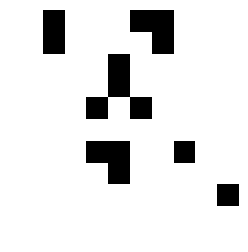

no of generation: 196
5


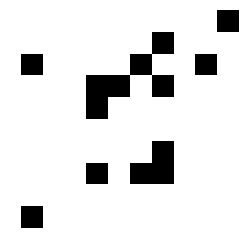

no of generation: 197
5


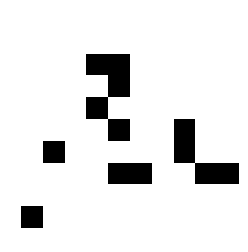

no of generation: 198
6


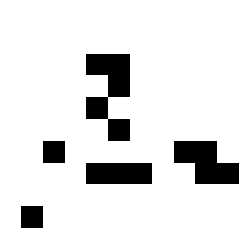

no of generation: 199
4


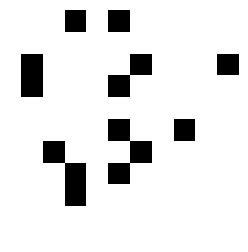

no of generation: 200
3


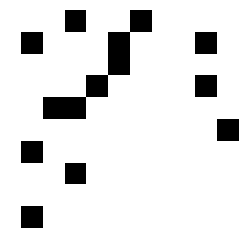

no of generation: 201
4


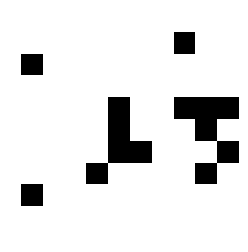

no of generation: 202
5


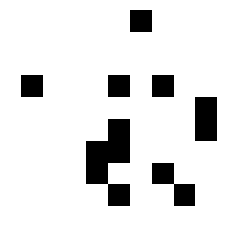

no of generation: 203
4


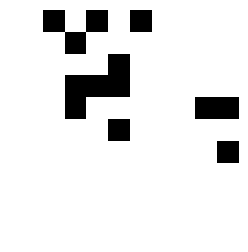

no of generation: 204
5


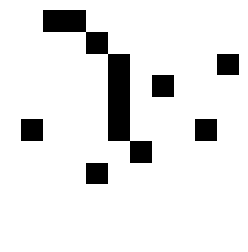

no of generation: 205
4


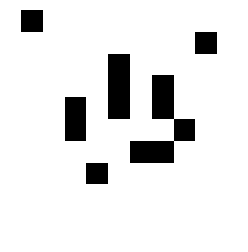

no of generation: 206
5


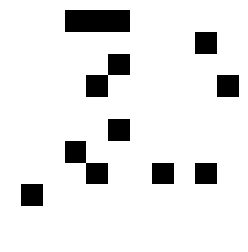

no of generation: 207
4


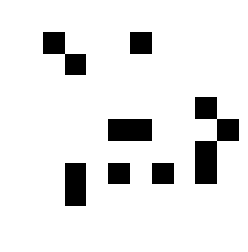

no of generation: 208
5


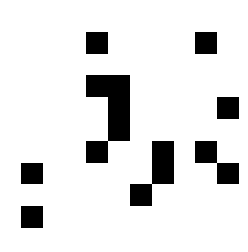

no of generation: 209
4


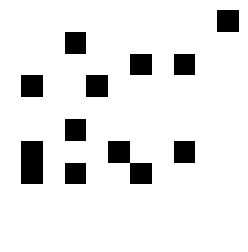

no of generation: 210
4


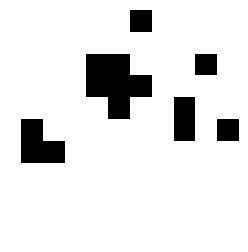

no of generation: 211
5


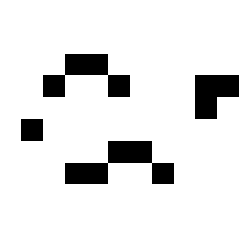

no of generation: 212
4


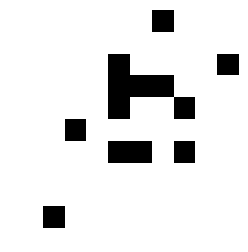

no of generation: 213
5


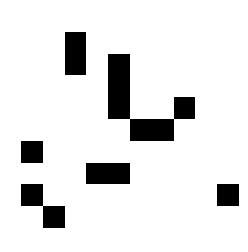

no of generation: 214
5


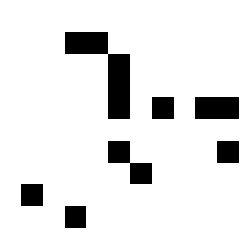

no of generation: 215
4


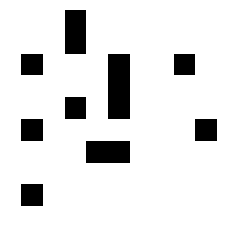

no of generation: 216
4


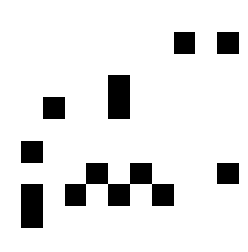

no of generation: 217
5


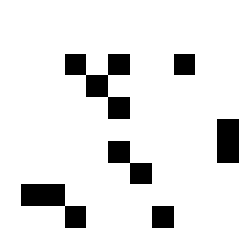

no of generation: 218
5


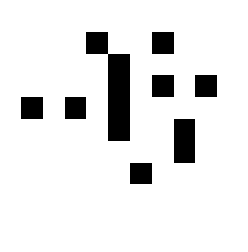

no of generation: 219
4


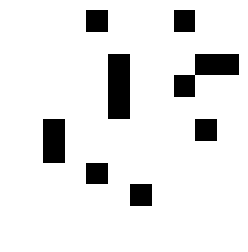

no of generation: 220
4


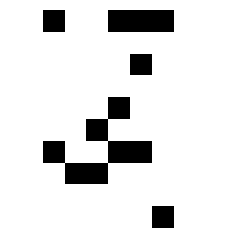

no of generation: 221
4


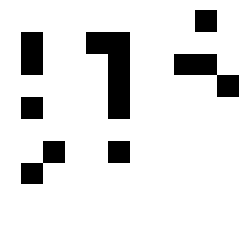

no of generation: 222
4


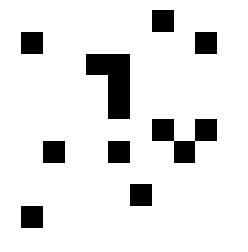

no of generation: 223
5


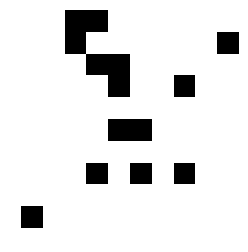

no of generation: 224
5


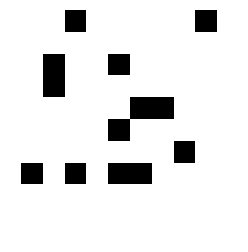

no of generation: 225
5


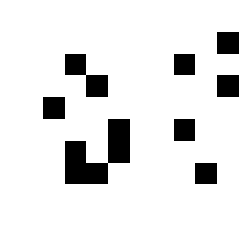

no of generation: 226
4


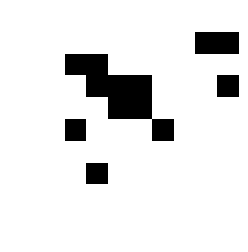

no of generation: 227
5


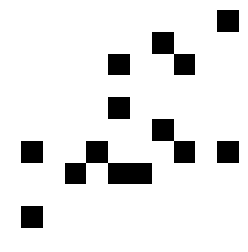

no of generation: 228
5


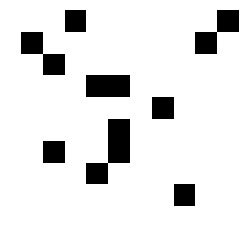

no of generation: 229
4


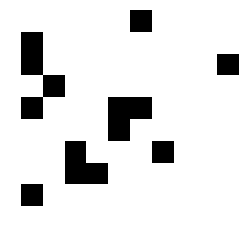

no of generation: 230
4


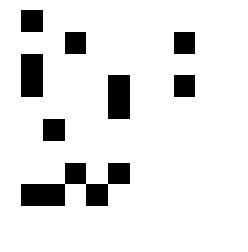

no of generation: 231
5


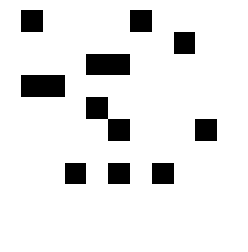

no of generation: 232
4


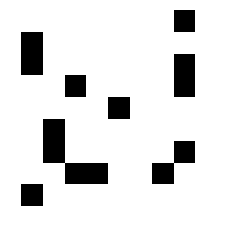

no of generation: 233
5


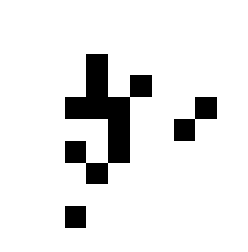

no of generation: 234
4


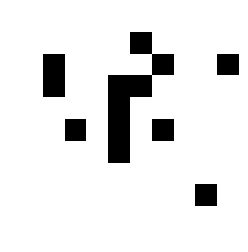

no of generation: 235
5


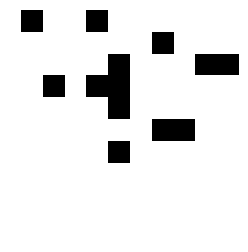

no of generation: 236
4


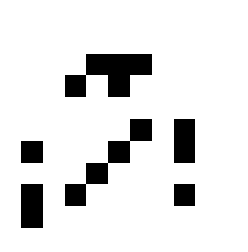

no of generation: 237
5


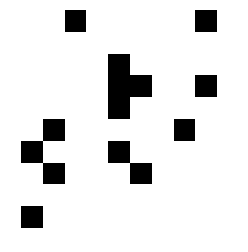

no of generation: 238
5


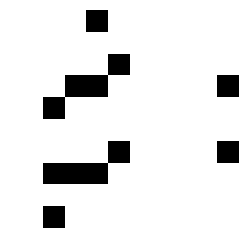

no of generation: 239
5


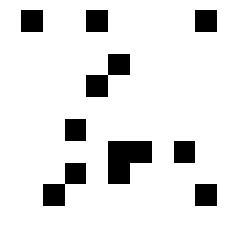

no of generation: 240
5


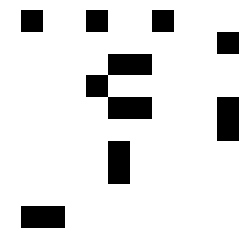

no of generation: 241
5


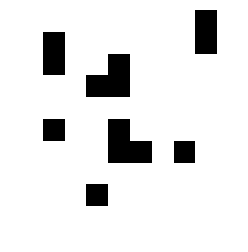

no of generation: 242
4


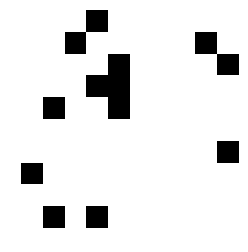

no of generation: 243
4


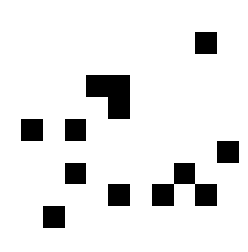

no of generation: 244
5


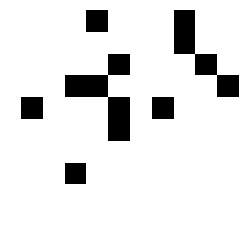

no of generation: 245
5


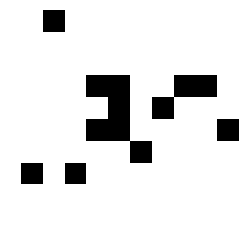

no of generation: 246
5


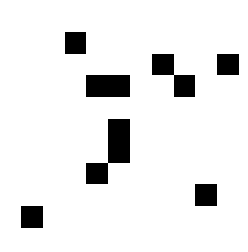

no of generation: 247
4


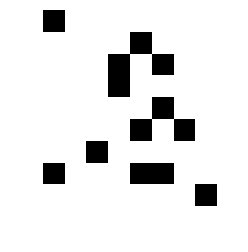

no of generation: 248
5


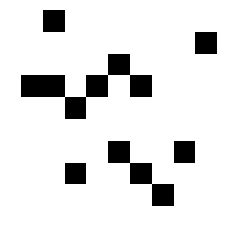

no of generation: 249
5


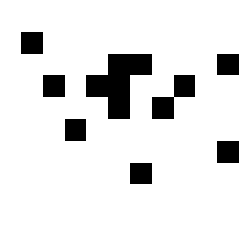

no of generation: 250
4


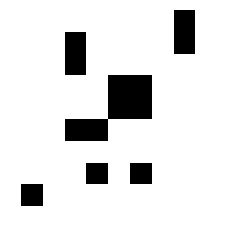

no of generation: 251
5


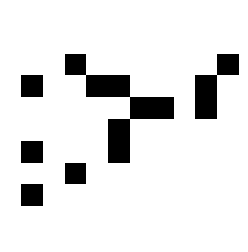

no of generation: 252
5


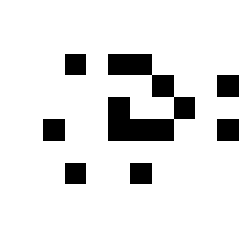

no of generation: 253
5


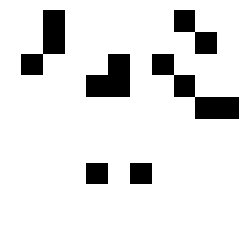

no of generation: 254
4


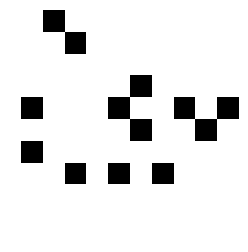

no of generation: 255
5


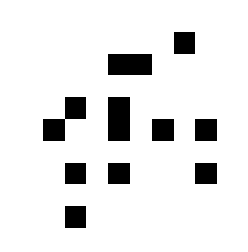

no of generation: 256
3


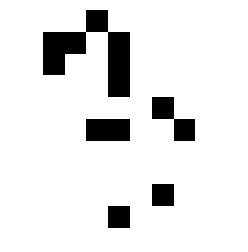

no of generation: 257
4


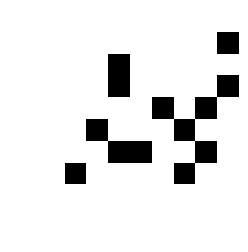

no of generation: 258
4


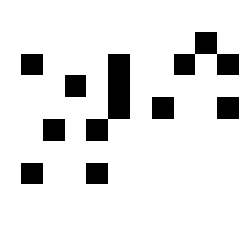

no of generation: 259
5


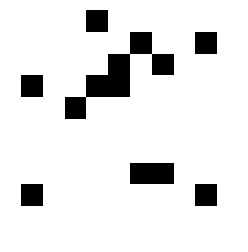

no of generation: 260
5


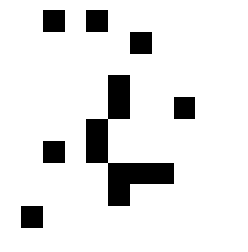

no of generation: 261
5


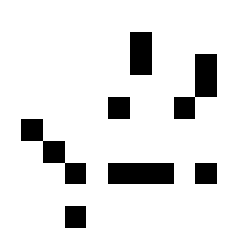

no of generation: 262
5


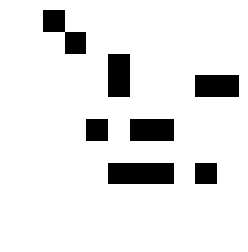

no of generation: 263
4


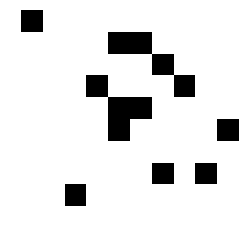

no of generation: 264
4


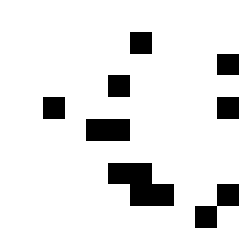

no of generation: 265
5


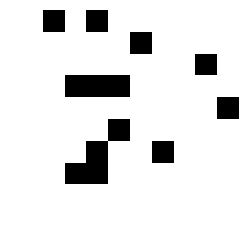

no of generation: 266
5


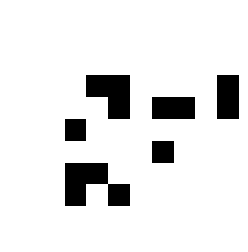

no of generation: 267
5


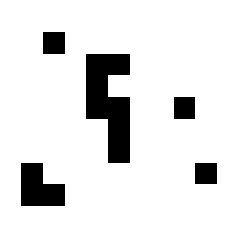

no of generation: 268
4


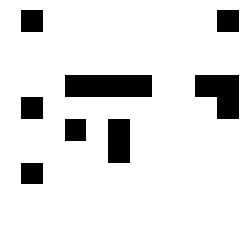

no of generation: 269
5


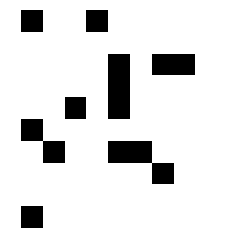

no of generation: 270
4


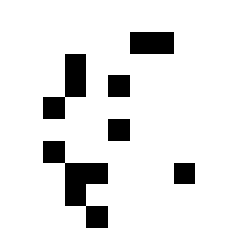

no of generation: 271
4


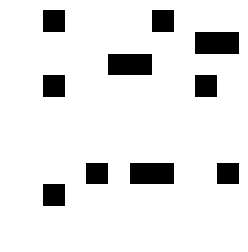

no of generation: 272
4


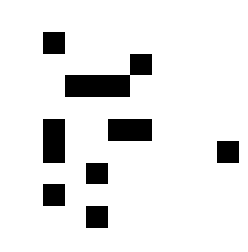

no of generation: 273
5


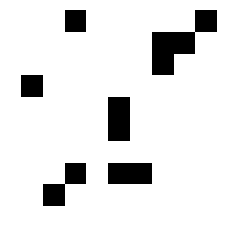

no of generation: 274
4


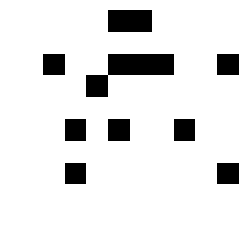

no of generation: 275
4


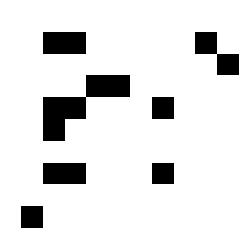

no of generation: 276
4


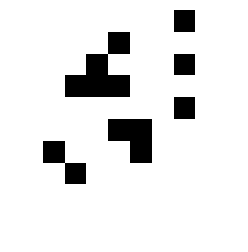

no of generation: 277
3


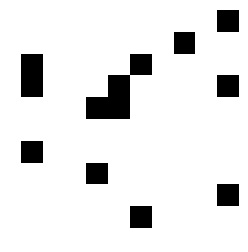

no of generation: 278
5


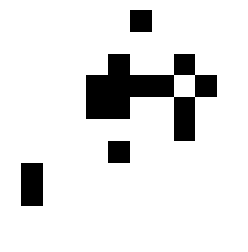

no of generation: 279
5


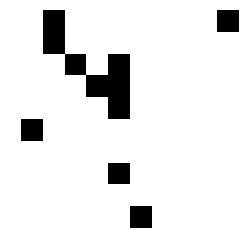

no of generation: 280
5


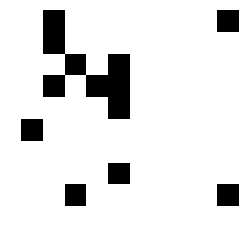

no of generation: 281
5


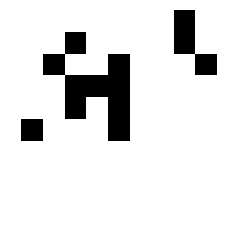

no of generation: 282
4


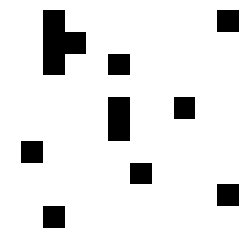

no of generation: 283
5


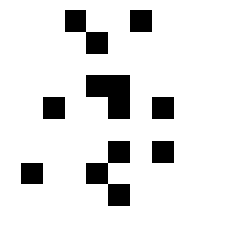

no of generation: 284
4


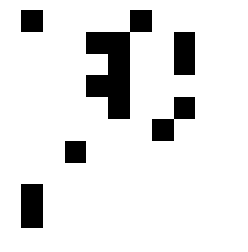

no of generation: 285
5


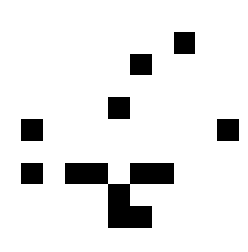

no of generation: 286
5


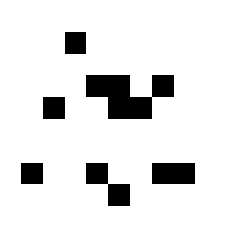

no of generation: 287
4


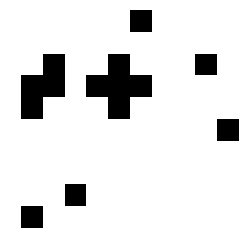

no of generation: 288
5


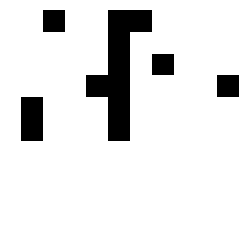

no of generation: 289
5


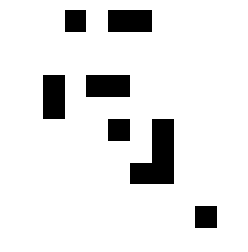

no of generation: 290
4


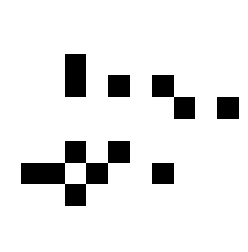

no of generation: 291
5


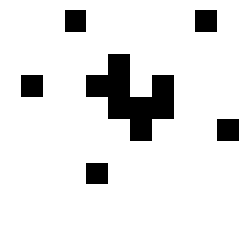

no of generation: 292
4


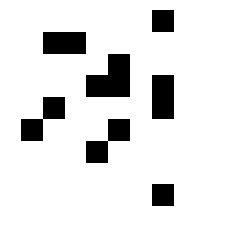

no of generation: 293
4


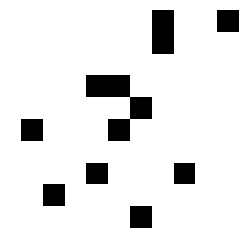

no of generation: 294
4


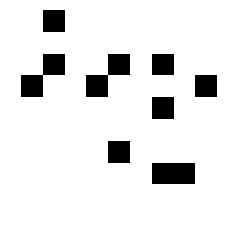

no of generation: 295
4


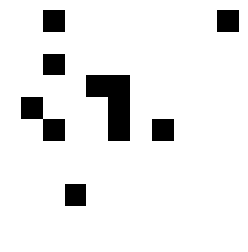

no of generation: 296
5


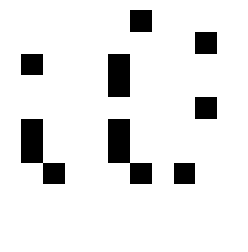

no of generation: 297
5


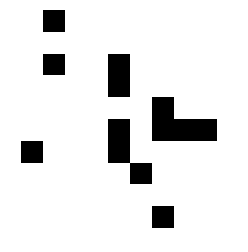

no of generation: 298
4


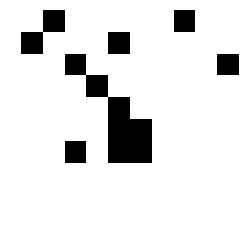

no of generation: 299
5


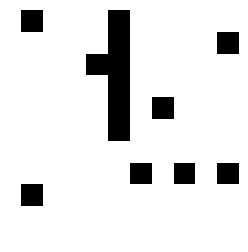

no of generation: 300
5


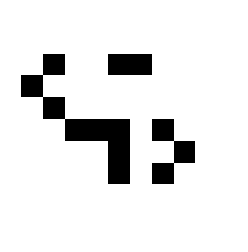

no of generation: 301
6


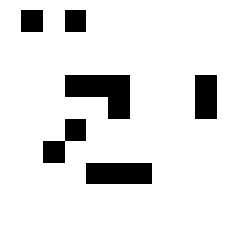

no of generation: 302
5


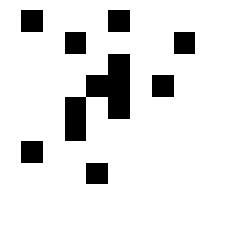

no of generation: 303
5


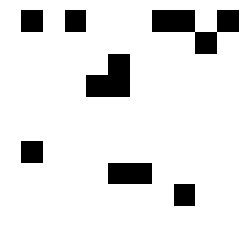

no of generation: 304
5


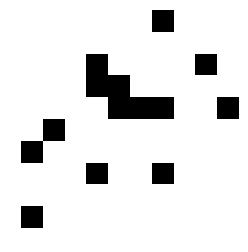

no of generation: 305
5


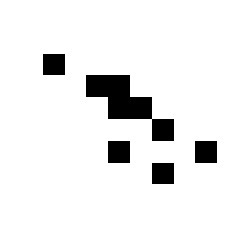

no of generation: 306
5


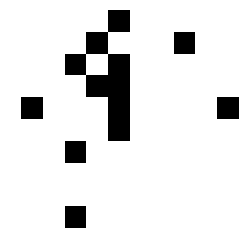

no of generation: 307
5


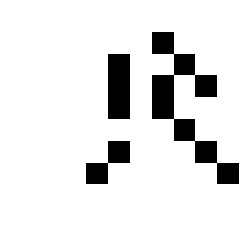

no of generation: 308
5


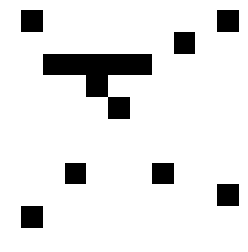

no of generation: 309
5


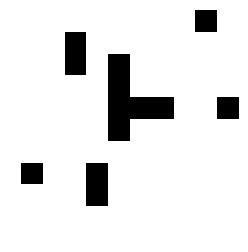

no of generation: 310
5


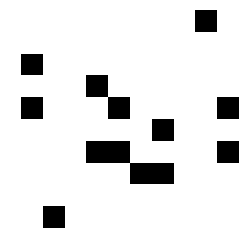

no of generation: 311
4


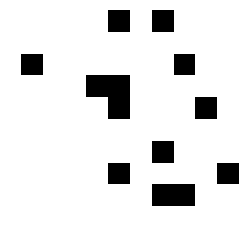

no of generation: 312
5


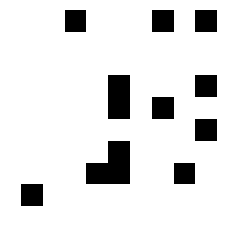

no of generation: 313
5


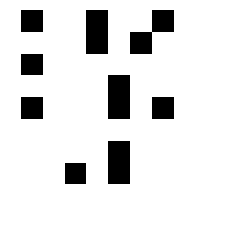

no of generation: 314
5


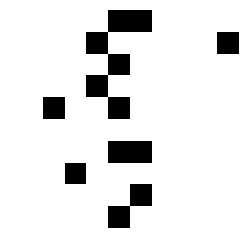

no of generation: 315
5


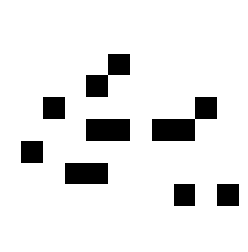

no of generation: 316
4


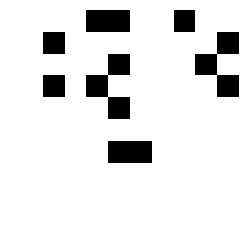

no of generation: 317
5


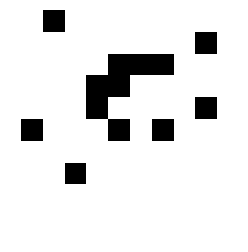

no of generation: 318
4


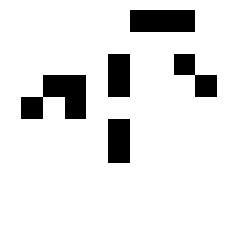

no of generation: 319
5


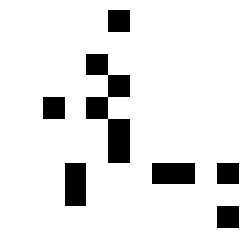

no of generation: 320
4


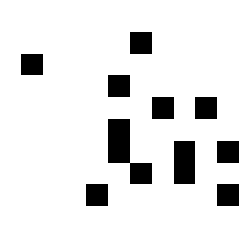

no of generation: 321
4


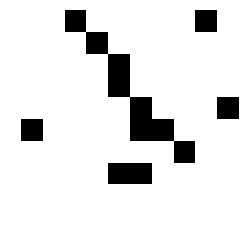

no of generation: 322
4


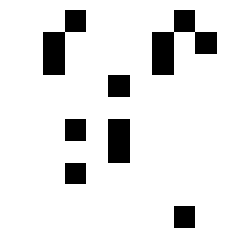

no of generation: 323
4


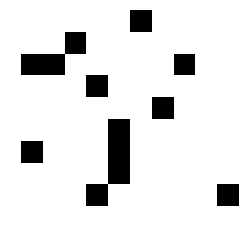

no of generation: 324
4


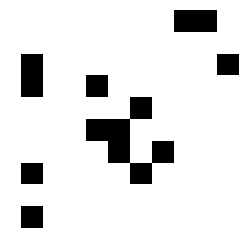

no of generation: 325
5


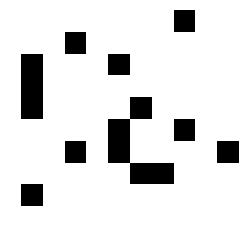

no of generation: 326
4


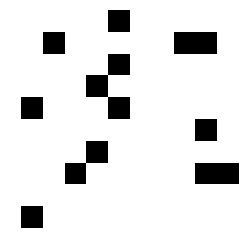

no of generation: 327
6


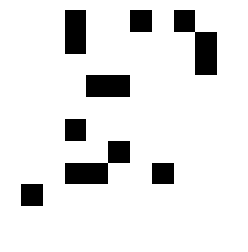

no of generation: 328
5


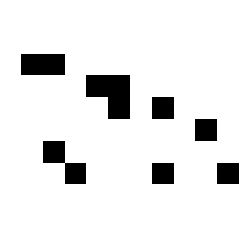

no of generation: 329
4


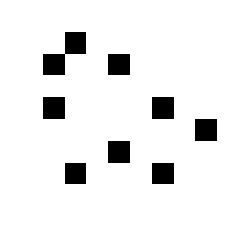

no of generation: 330
4


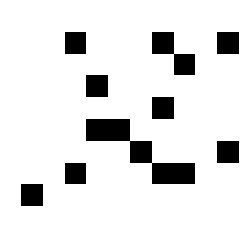

no of generation: 331
6


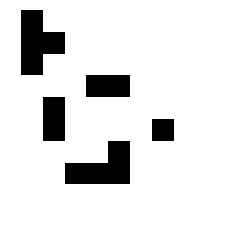

no of generation: 332
4


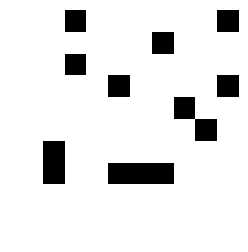

no of generation: 333
4


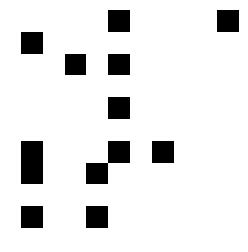

no of generation: 334
4


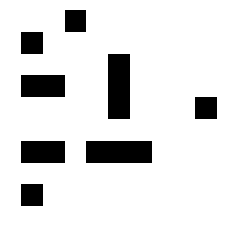

no of generation: 335
6


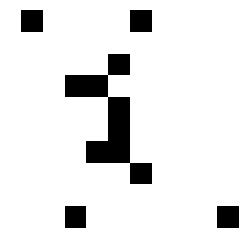

no of generation: 336
5


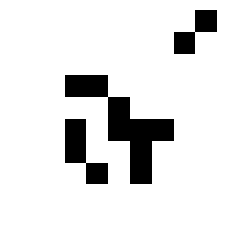

no of generation: 337
5


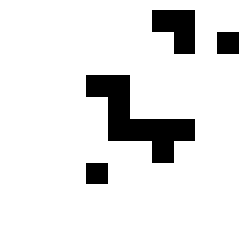

no of generation: 338
6


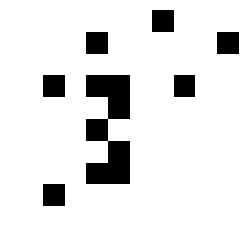

no of generation: 339
4


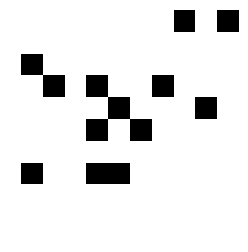

no of generation: 340
5


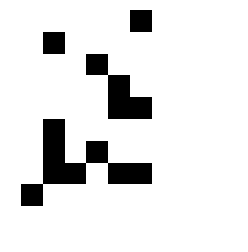

no of generation: 341
6


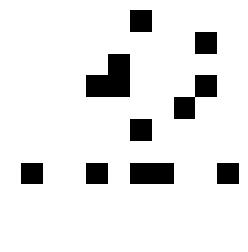

no of generation: 342
5


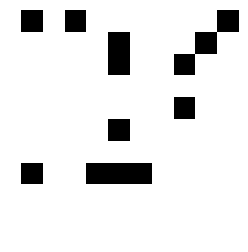

no of generation: 343
5


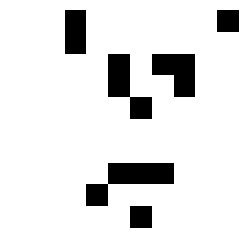

no of generation: 344
5


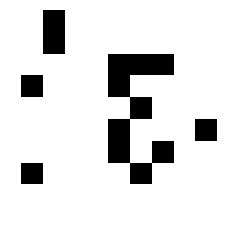

no of generation: 345
4


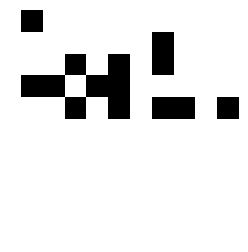

no of generation: 346
4


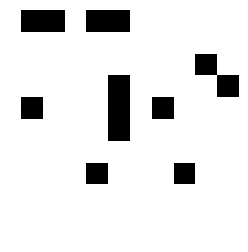

no of generation: 347
4


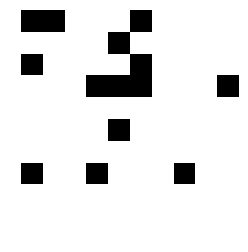

no of generation: 348
4


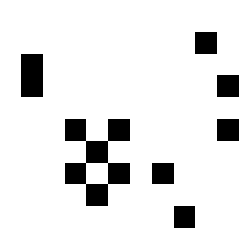

no of generation: 349
4


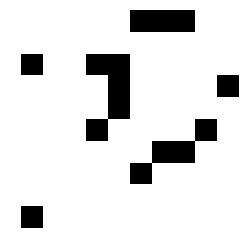

no of generation: 350
4


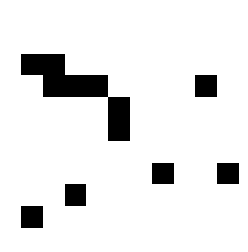

no of generation: 351
5


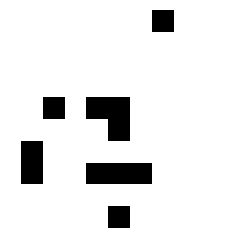

no of generation: 352
5


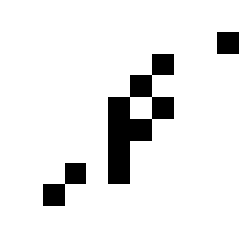

no of generation: 353
5


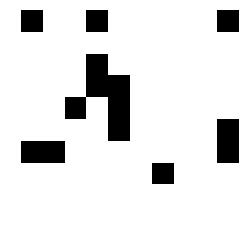

no of generation: 354
4


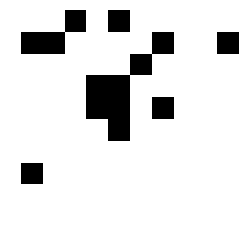

no of generation: 355
5


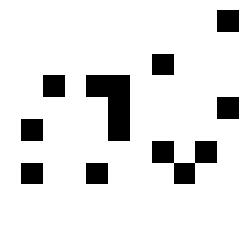

no of generation: 356
4


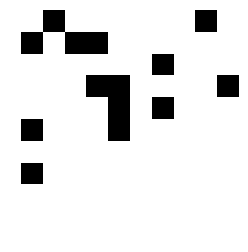

no of generation: 357
4


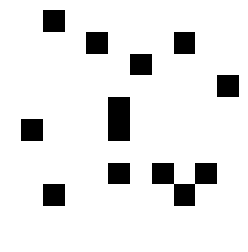

no of generation: 358
6


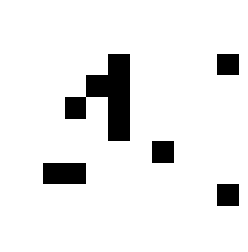

no of generation: 359
4


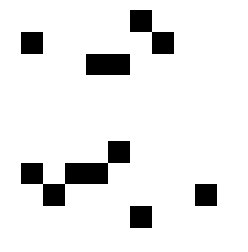

no of generation: 360
4


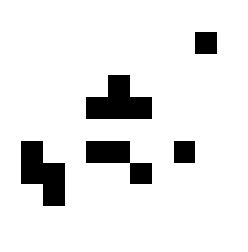

no of generation: 361
3


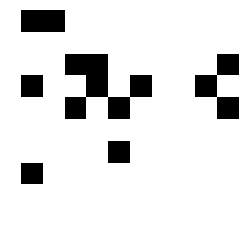

no of generation: 362
5


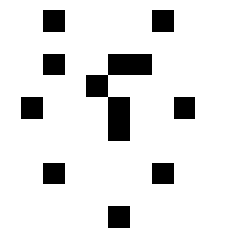

no of generation: 363
5


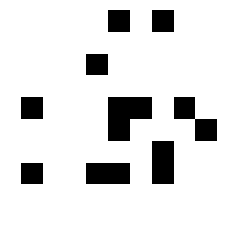

no of generation: 364
4


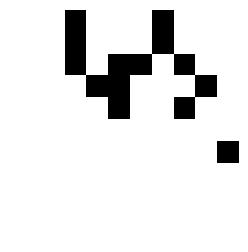

no of generation: 365
4


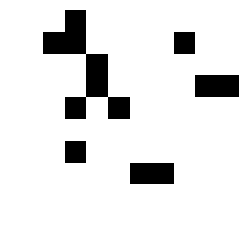

no of generation: 366
4


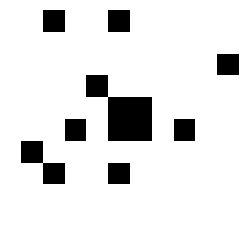

no of generation: 367
5


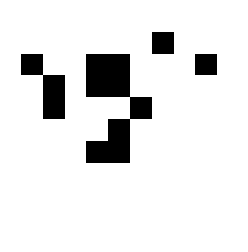

no of generation: 368
5


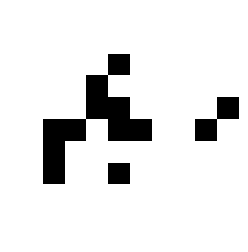

no of generation: 369
5


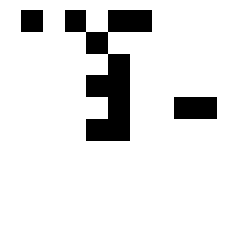

no of generation: 370
5


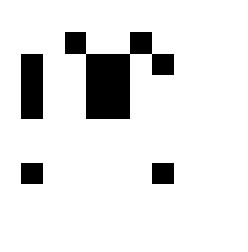

no of generation: 371
4


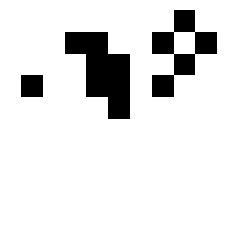

no of generation: 372
5


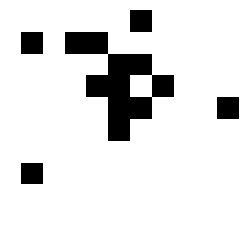

no of generation: 373
5


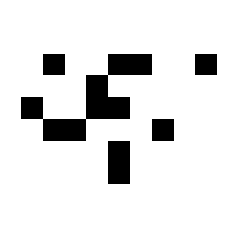

no of generation: 374
4


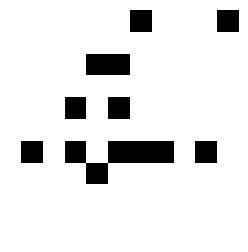

no of generation: 375
5


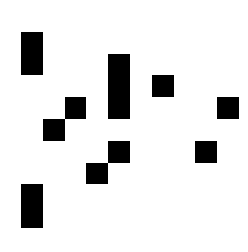

no of generation: 376
5


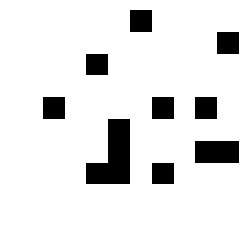

no of generation: 377
5


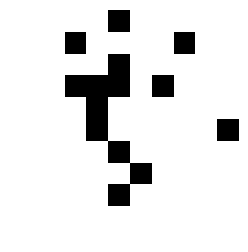

no of generation: 378
5


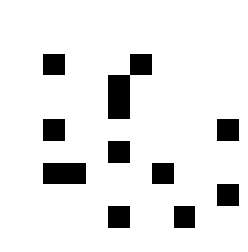

no of generation: 379
6


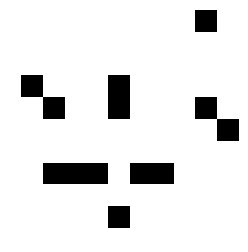

no of generation: 380
4


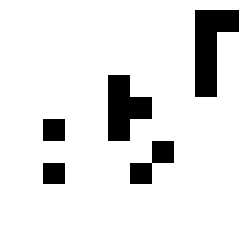

no of generation: 381
5


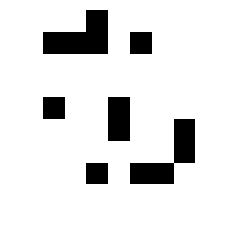

no of generation: 382
5


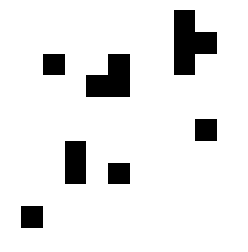

no of generation: 383
4


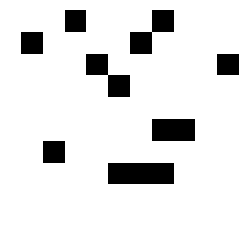

no of generation: 384
4


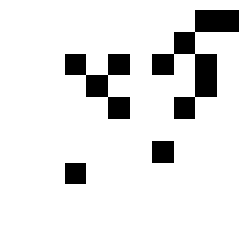

no of generation: 385
5


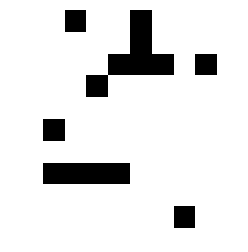

no of generation: 386
4


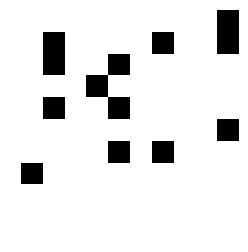

no of generation: 387
3


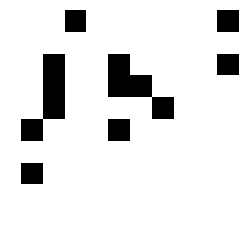

no of generation: 388
4


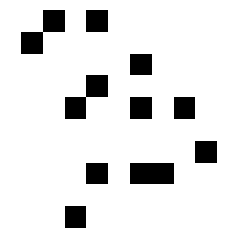

no of generation: 389
5


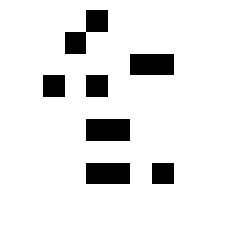

no of generation: 390
6


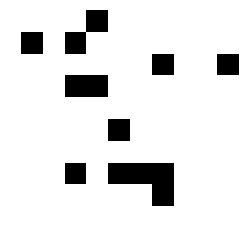

no of generation: 391
4


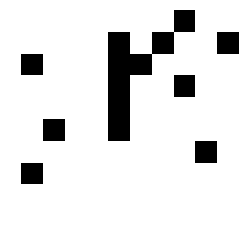

no of generation: 392
5


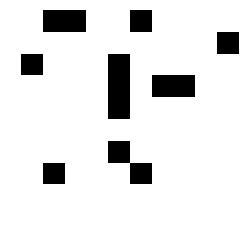

no of generation: 393
5


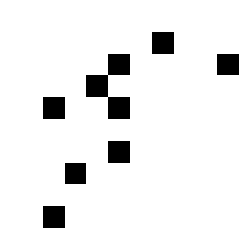

no of generation: 394
6


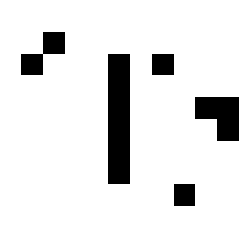

no of generation: 395
6


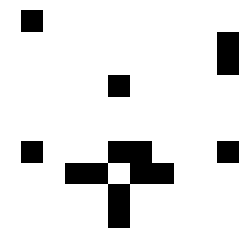

no of generation: 396
5


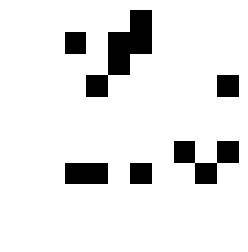

no of generation: 397
5


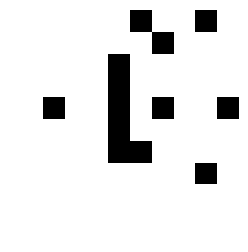

no of generation: 398
4


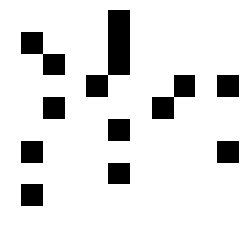

no of generation: 399
4


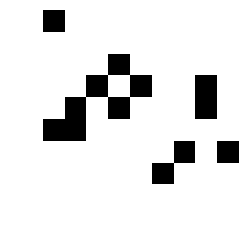

no of generation: 400
4


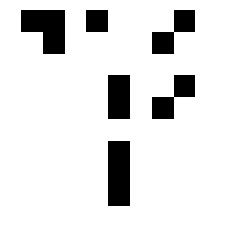

no of generation: 401
4


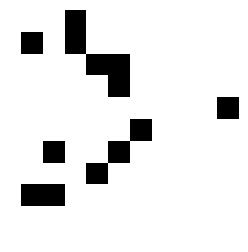

no of generation: 402
5


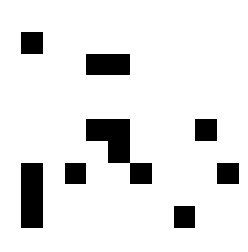

no of generation: 403
4


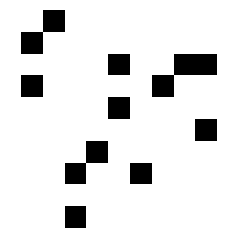

no of generation: 404
4


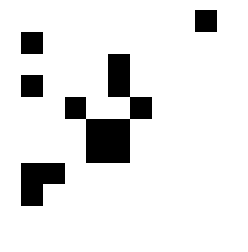

no of generation: 405
4


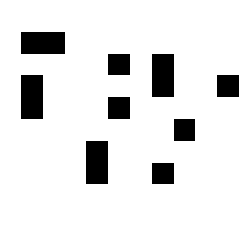

no of generation: 406
5


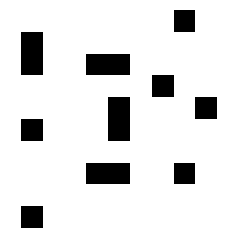

no of generation: 407
5


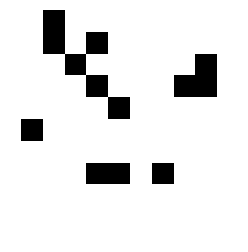

no of generation: 408
4


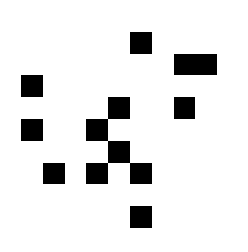

no of generation: 409
4


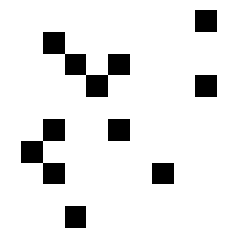

no of generation: 410
4


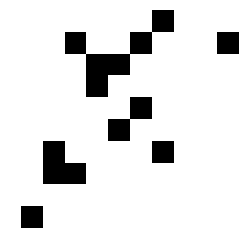

no of generation: 411
5


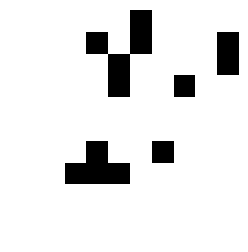

no of generation: 412
4


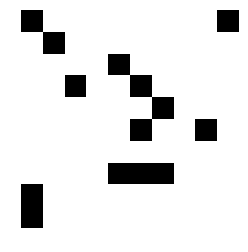

no of generation: 413
4


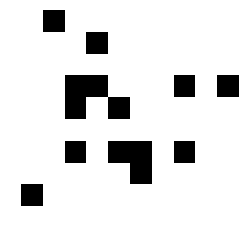

no of generation: 414
4


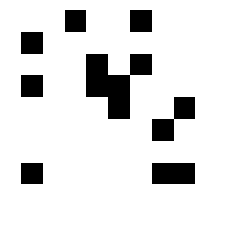

no of generation: 415
4


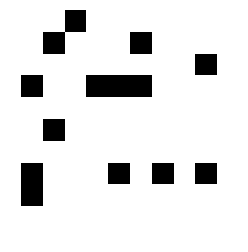

no of generation: 416
5


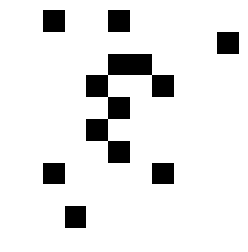

no of generation: 417
4


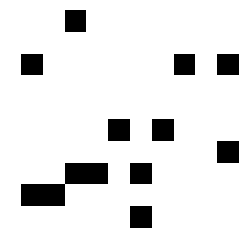

no of generation: 418
5


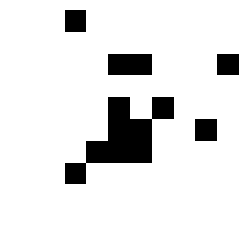

no of generation: 419
4


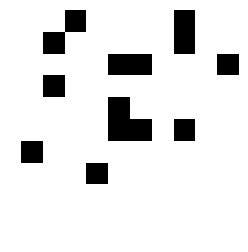

no of generation: 420
4


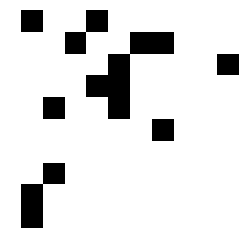

no of generation: 421
5


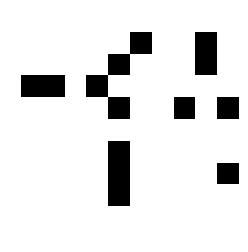

no of generation: 422
4


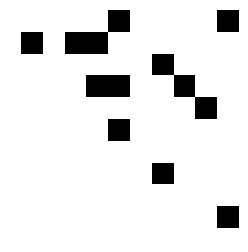

no of generation: 423
4


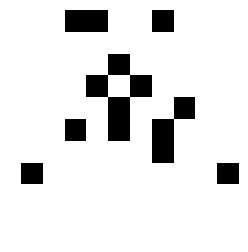

no of generation: 424
6


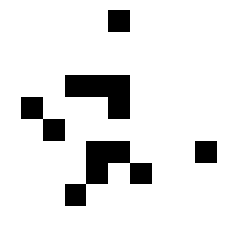

no of generation: 425
5


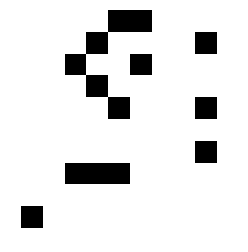

no of generation: 426
6


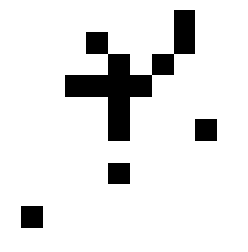

no of generation: 427
5


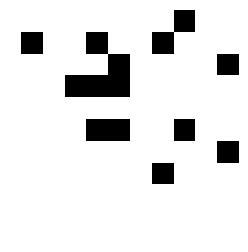

no of generation: 428
5


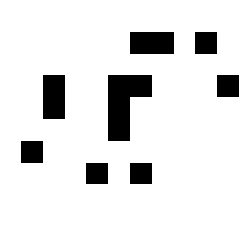

no of generation: 429
4


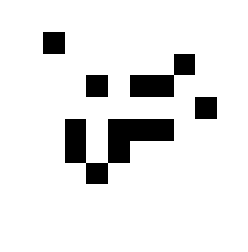

no of generation: 430
3


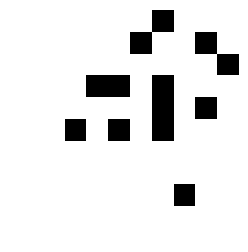

no of generation: 431
4


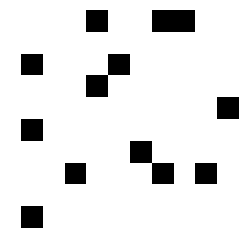

no of generation: 432
4


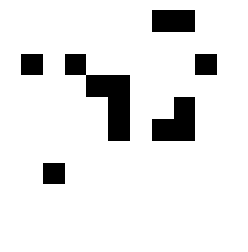

no of generation: 433
5


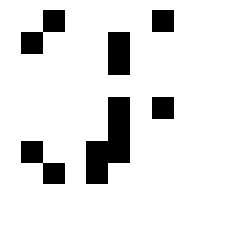

no of generation: 434
5


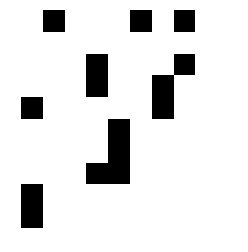

KeyboardInterrupt: 

In [148]:
#img = Image.open('test.png')
img = cv2.imread('test.png',0)
for i in range(len(img)):
    for j in range(len(img[0])):
        
        
        if(img[i][j] == 255):

            img[i][j] = 1

#plt.imshow(newPopulation(3,target)[0], interpolation = "nearest")
#plt.show()
target = img
pop_max = 50
num_of_points = 12
pop = newPopulation(pop_max, target, num_of_points)

count=0
flag = 1
while(flag == 1):
    count+=1
    
    population_fitness = populationFitness(pop, target)
    
    pool = matingPool(population_fitness)

    
    pop,population_points=createChildren(pool, pop_max, num_of_points)
    
    pop=mutatePopulation(pop, 80, population_points)
    print("no of generation:",count)
    max = 0
    max_i = pop[0]
    for i in pop:
        if(fitness(i, target) > 1000 ):
            flag = 0
            print("no of generation:",count)
            break
        if(fitness(i, target) > max):
            max = fitness(i, target)
            max_i = i
    print(fitness(max_i, target))
    plt.imshow(max_i, cmap = plt.cm.gray)
    plt.axis("off")
    #plt.imshow(max_i,interpolation='nearest')
    #plt.pause(0.001)        
    plt.show()


In [73]:
random.random()


0.8666635474829743

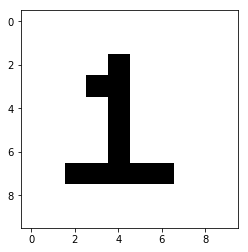

In [113]:
plt.imshow(target, cmap = plt.cm.gray)
plt.show()
